In [1]:
%matplotlib inline
import sys
import outliers
import pandas as pd
import matplotlib.pyplot as plt
from outliers import ddc_outlier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

prescription = pd.read_csv('../data/prescriptions_subdose.csv.gz', compression='gzip')

In [2]:
medications = outliers.getOverdoseMedications(prescription)
medications.shape

(74,)

In [3]:
ep_range = np.arange(0.01,1.0,0.01)
results, max_f = outliers.runParameterSearch(prescription, np.asarray(medications), ep_range)

ABACAVIR 300 mg CP, 2124, 22, 4, 264.87994350282486, 278.70852480885253, 151.0, 1.0, 151.0, 600.0, 528.5310734463277, 127.80011934019265, 600.0, 600.0, 600.0, 600.0, 1.228813559322034, 0.4200689400472451, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.04), 1.0, , (IsoF+0.02), 0.0831758034026465, , (Cov+0.75), 0.07954545454545456, , (DDC-C+0.48000000000000004), 1.0, 
ACICLOVIR 200 mg CP, 2359, 63, 19, 138.44150063586267, 178.69923255932096, 103.0, 3.0, 103.0, 200.0, 273.59050445103856, 165.33482211210094, 200.0, 200.0, 200.0, 200.0, 3.2924968206867318, 0.8494511590487249, 3.0, 3.0, 3.0, 3.0, (DDC-J+0.42000000000000004), 0.36416184971098264, , (IsoF+0.05), 0.6702127659574468, , (Cov+0.01), 0.0, , (DDC-C+0.53), 0.46428571428571436, 
ALOPURINOL 100 mg CP, 4729, 23, 12, 79.5297631634595, 99.94326598051478, 53.0, 1.0, 53.0, 100.0, 157.67604144639458, 88.1080476457649, 100.0, 100.0, 100.0, 300.0, 1.3834848805244238, 0.7766278436973779, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.04), 0.6388888888888888, , (IsoF+0.01), 0.1445

DIGOXINA 0,25 mg CP, 3112, 34, 12, 0.5869810411311054, 0.4572540364151411, 0.5, 0.125, 0.5, 1.0, 0.15371786632390746, 0.06011619609539146, 0.125, 0.125, 0.125, 0.125, 1.0202442159383034, 0.19777409667313278, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.11), 0.5190839694656488, , (IsoF+0.03), 0.5190839694656488, , (Cov+0.55), 0.08842652795838751, , (DDC-C+0.54), 0.8395061728395062, 
DIPIRONA 1 g/2 ml SOL INJ, 163027, 651, 18, 491.0286278653229, 492.467024788106, 6.0, 4.0, 6.0, 1000.0, 978.0511939740043, 103.27407876752423, 1000.0, 1000.0, 1000.0, 1000.0, 4.006061756641539, 0.2141584638680078, 4.0, 4.0, 4.0, 4.0, (DDC-J+0.06999999999999999), 0.8416289592760181, , (IsoF+0.01), 0.4163934426229508, , (Cov+0.14), 0.41625696492953124, , (DDC-C+0.46), 0.5945945945945946, 
DIPIRONA 500 mg/ml SOL ORAL - com conta-gotas acoplado na tampa do frasco ou na embalagem do medicamento, 28967, 1360, 22, 21.344828943280287, 17.809323202007736, 13.0, 4.0, 13.0, 40.0, 38.65640211274899, 5.901216630939773, 40.0, 40.0, 40.0,

SULFAMETOXAZOL + TRIMETOPRIMA 400 mg + 80 mg / 5 ml SOL INJ, 2052, 318, 27, 8.806530214424951, 6.786090165512628, 4.5, 3.0, 4.5, 15.0, 14.6135477582846, 4.827408314938994, 15.0, 10.0, 15.0, 15.0, 2.999512670565302, 1.1641576011884125, 3.0, 2.0, 3.0, 4.0, (DDC-J+0.32), 0.1851106639839034, , (IsoF+0.31), 0.5403568394222601, , (Cov+0.31), 0.667375132837407, , (DDC-C+0.81), 0.4949258391881343, 
SULFAMETOXAZOL + TRIMETOPRIMA 800 mg + 160 mg CP, 7086, 137, 14, 492.4730242732148, 504.10586326584166, 242.0, 1.0, 242.0, 960.0, 983.8103302286198, 159.43818997232805, 960.0, 960.0, 960.0, 960.0, 1.1357183178097656, 0.45813678752393094, 1.0, 1.0, 1.0, 1.0, (DDC-J+0.14), 0.65083135391924, , (IsoF+0.01), 0.9037037037037037, , (Cov+0.01), 0.0, , (DDC-C+0.49), 0.937984496124031, 
SULFATO DE MAGNESIO 10% 10 ml, 1645, 37, 16, 22.37720364741641, 23.300174740552713, 6.0, 1.0, 6.0, 50.0, 43.59635258358663, 13.590716886189192, 50.0, 50.0, 50.0, 50.0, 1.1580547112462005, 0.7642887211560269, 1.0, 1.0, 1.0, 1.0

In [4]:
display(results)

,Time,Accuracy,Recall,Precision,F-Measure
DDC-J,0.032549,0.962573,0.904127,0.611907,0.687436
IsoF,0.375882,0.961465,0.916773,0.538687,0.620476
Cov,0.510608,0.693365,0.620083,0.348632,0.381917
DDC-C,0.065588,0.932944,0.722320,0.546396,0.519544


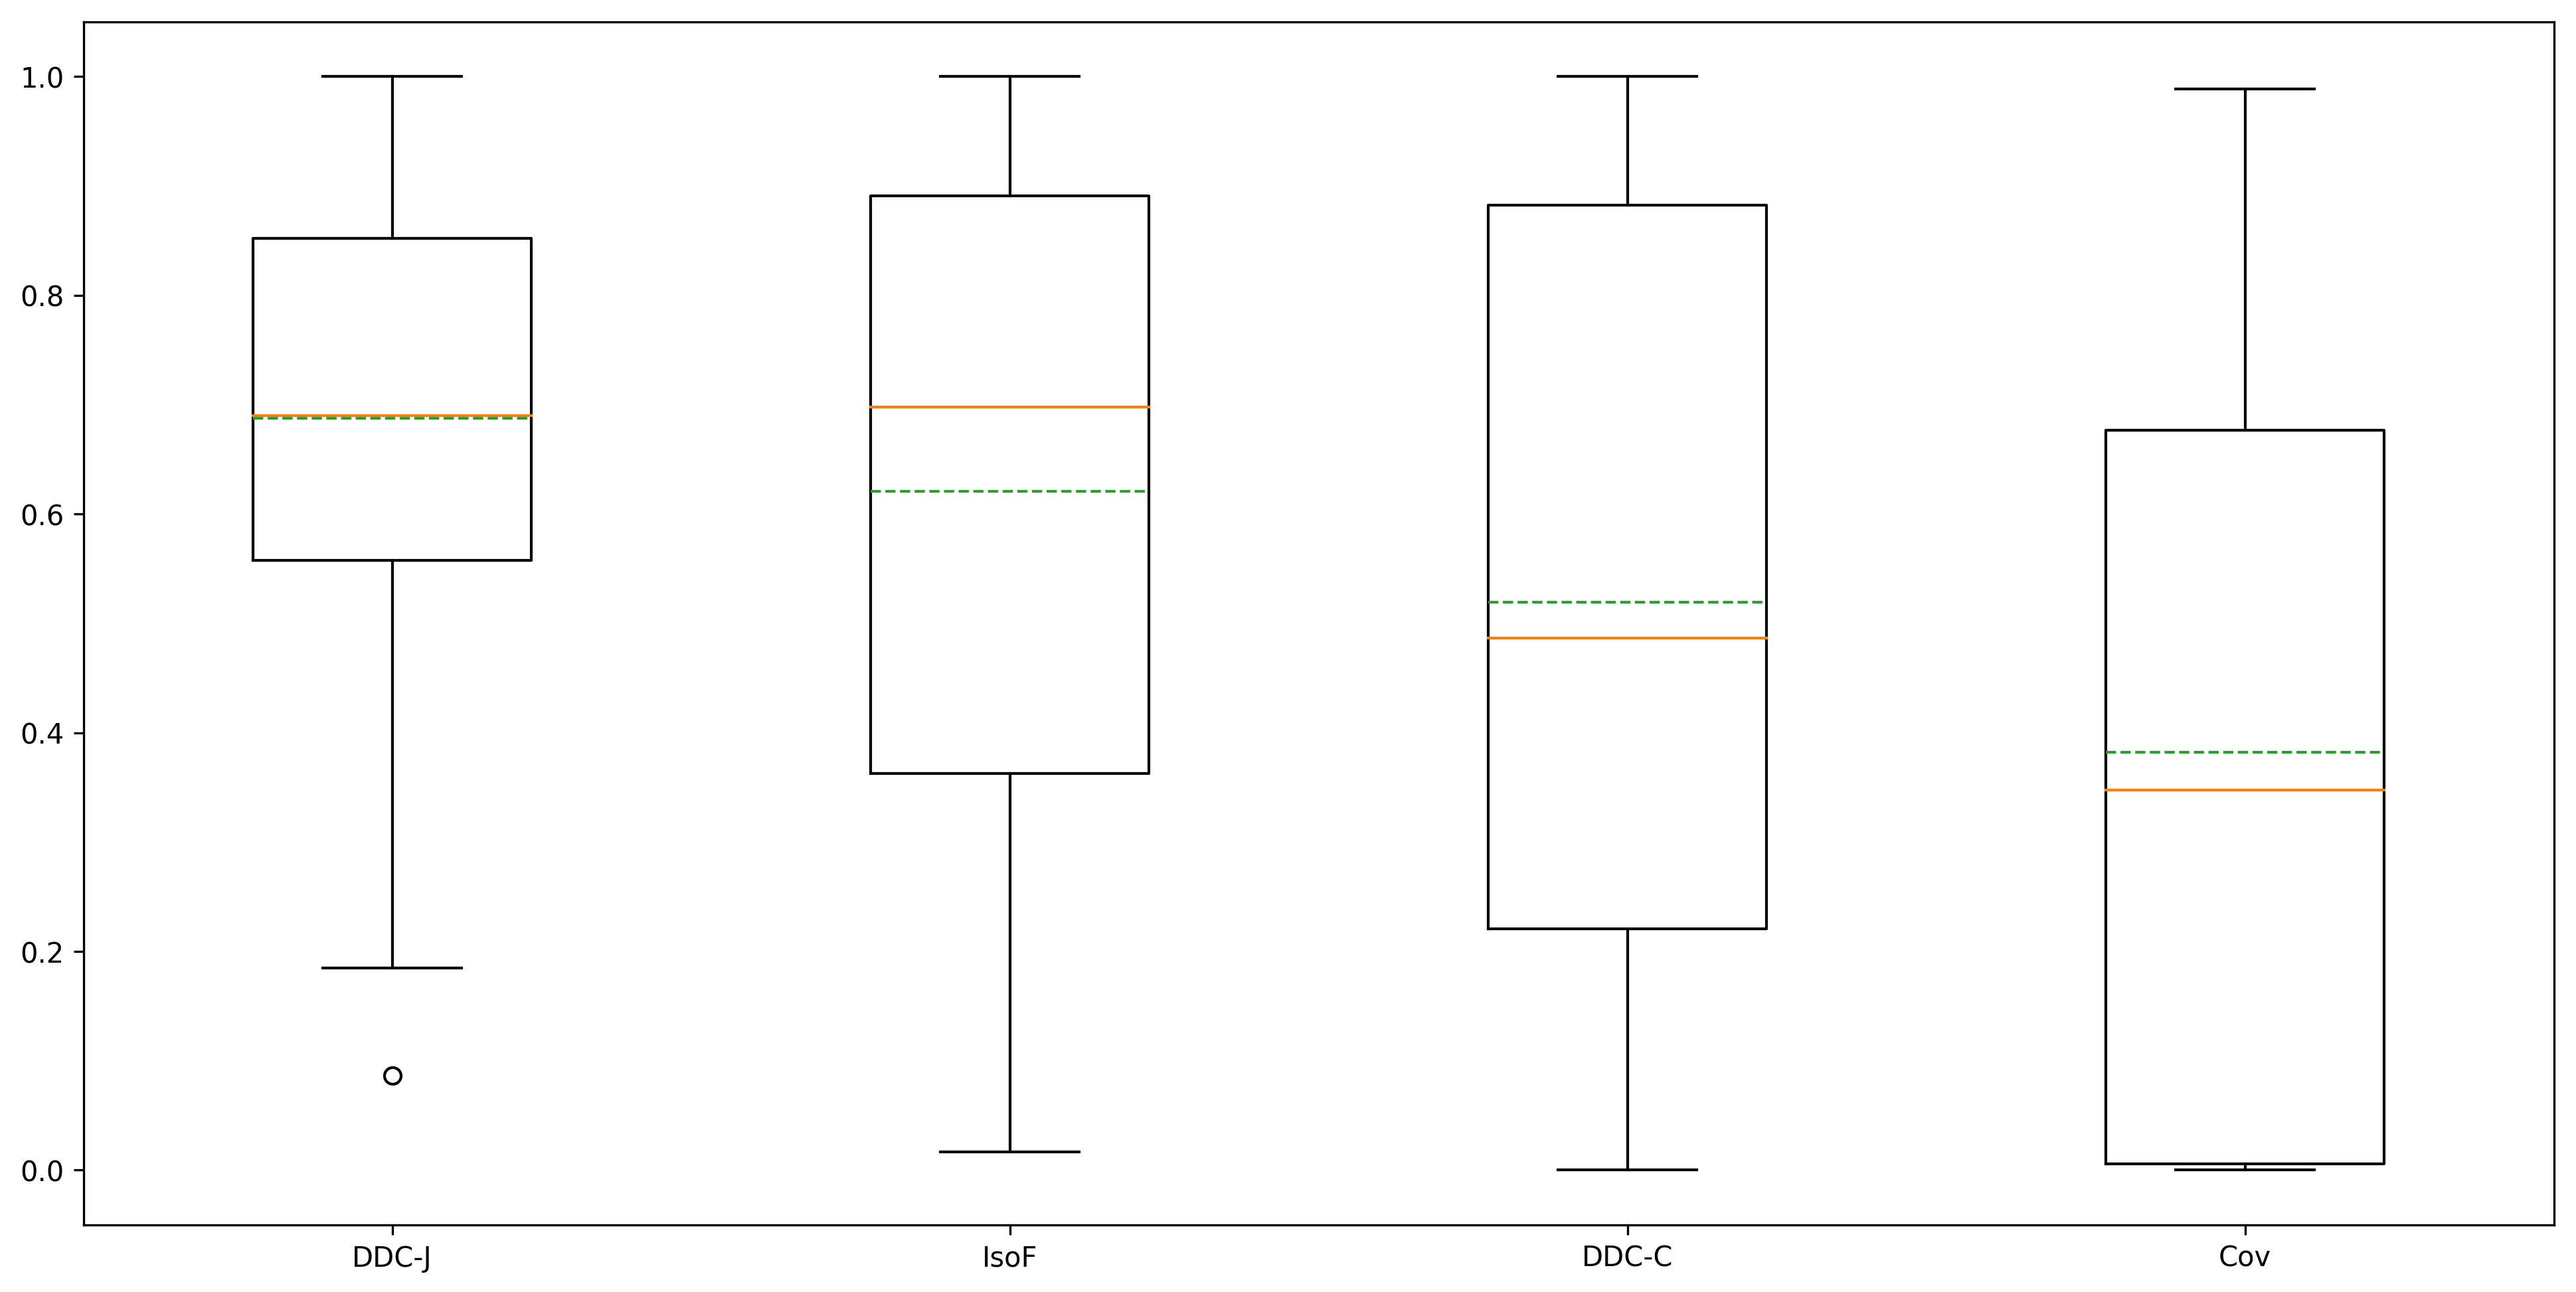

In [11]:
%matplotlib inline
plt.figure(figsize=(16, 8), dpi= 300)

data = []

data.append(max_f.loc['DDC-J'].values)
data.append(max_f.loc['IsoF'].values)
data.append(max_f.loc['DDC-C'].values)
data.append(max_f.loc['Cov'].values)    

labels = ['DDC-J','IsoF','DDC-C','Cov']

plt.boxplot(data, labels=labels, showmeans=True, meanline=True)

plt.show()